## ANOMALY DETECTION TUTORIAL

### Anomaly Detection - Introduction

An anomaly is defined as a deviation from what is, considered normal, or expected. Anomaly detection is the term used to describe the processes that allow us to find these deviations in data sets. In terms of data anomalies are also described by other terms such as outliers, exceptions, discordant observations, peculiarities etc. Anomaly detection is a fundamental issue in numerous fields and is used to enhance cyber security, minimize credit card fraud, improve healthcare and insurance systems and numerous other fields. 
![alt text](cluster.png "Cluster") 
Anomalies are patterns in data that do not conform to a well defined notion of normal behavior. Figure 1 illustrates anomalies in a simple 2-dimensional data set. The data has two normal regions, N1 and N2, since most observations lie in these two regions. Points that are sufficiently far away from the regions, e.g., points o1 and o2, and points in region O3, are anomalies.

The detection of anomalies allows us to make decisions on information which is more pertinent to the matter at hand. For example, Utilities use numerous sensors to track and forecast load. Sensors are prone to malfunctioning and this can produce a corrupted data set and affect the quality of the prediction. In this case anomaly detection becomes important.

Anomaly detection comes with numerous challenges such as: 
Since it is defined as a deviation from a defined normal, we need to define the range of deviation that is accepted. 
What is considered “normal” can be adaptive. 
The deviation is also domain specific, in the healthcare industry the deviation is bound to be extremely small whereas in the energy sector a wider range can be accepted. 
Data may contain noise which may mask anomalies and make detection difficult. 

The various techniques that can be used for anomaly detection are divided into two main categories: Supervised and Unsupervised. Some of the 'supervised' algorithms are:
- k-Nearest Neighbors
- Bayesian Networks
- Neural Networks
- Support Vector Machine
- Decision Trees

Some of the 'unsupervised' algorithms are:
- k-means clustering
- Fuzzy C-Means
- Expectation-Maximization Meta Algorithm

### Unsupervised clustering algorithm

The technique chosen for this tutorial is K means Clustering. This method groups objects based on their feature values into K disjoint clusters. K is the number of disjoint clusters and needs to be defined. It is done in the following steps:
- Define the number of clusters, K
- nitialize K cluster centroids
- Measure distance of all data points with all centroids and form K clusters
- Recalculate Centroids of clusters
- Repeat step 3 and 4 till centroids are constant

The distance is measured using the euclidean distance function:

$$c = \sqrt{\sum_{i=0}^m \ (xi - yi)^2 }$$
where x = (x1, ..., xm) and y = (y1, ..., ym) are two input vectors with m quantitative features.

![alt text](Outlier detection.png "Title")
If we use one cluster defined as normal with a specified maximum distance then we find that points P2 and P3 are anomalous.

## Demonstration of anomaly detection using k-means clustering

The electricity consumption (power) data is used as input to demonstrate the anomaly detection technique. It contains power consumption and date-time values for different points in the campus. For the scope of this demonstration, one particular point is selected and the power consumption trends for the entire year is mapped. This is a time-series data that varies between base load and peak load along with outliers that needs to be detected as anomalies. Anomalies can be detected in terms of unusual or unexpected behavior by clustering and finding the outliers. 

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import datetime as dt
%matplotlib inline
import platform

platform.python_version()

'2.7.10'

"Numpy" library is primarily used to extract and process the data. Scikit-learn package is used to implement the K-means algorithm for clustering. This package uses numpy arrays which explains the choice of 'numpy' library.
The csv file is imported using 'genfromtxt' method with the appropriate data formats. Each column series is given a name to be able to reference them based on their names instead of the column indices.

In [112]:
# IMPORTING POWER (ELECTRIC CONSUMPTION) DATA
dateConverter = lambda d : dt.datetime.strptime(d,'%Y/%m/%d %H:%M:%S')
power = np.genfromtxt('campusDemand.csv',delimiter=",",names=True,\
                      dtype=['S255',dt.datetime,'f8'],\
                      converters={1: dateConverter})

In [113]:
name, indices, counts  = np.unique(power['Point_name'], return_index=True,return_counts=True)

The full database is stored in a different variable called 'power_allpoints' to be able to test the data at different points of campus without having to read the csv file again each time. A particular point of energy meter is then selected for anomaly detection analysis. On observing the trend of different energy meter points, 'Main Campus' point was selected as it shows anomalies in particular sections and the code can hence be checked to remove the same.

In [114]:
power_allpoints = power

In [140]:
power=power_allpoints[power_allpoints['Point_name']==name[3]]
power = np.sort(power,order='Time')

#### Power consumption data trend:
The power (electric consumption) is plotted against its corresponding timestamp to observe the waveform pattern.

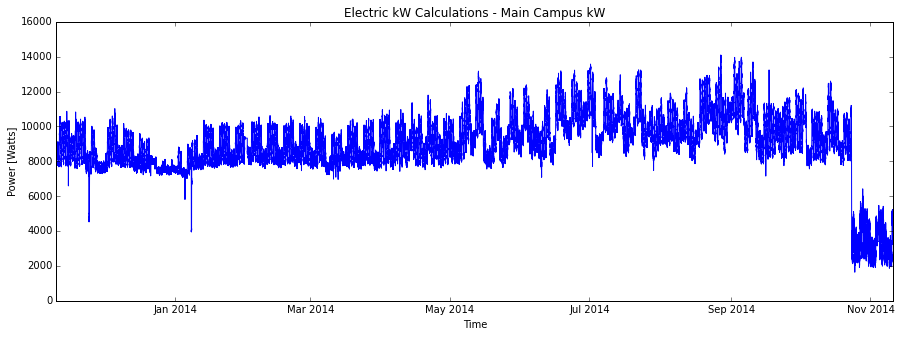

In [141]:
fig1= plt.figure(figsize=(15,5))
plt.plot(power['Time'],power['Value'])
plt.title(name[3])
plt.xlabel('Time')
plt.ylabel('Power [Watts]')

The obtained waveform shown anomalous behavior towards the month of November along with some individual points in other months that are highly varying from the current observed trend. This waveform generated for electricity consumption for throughout the year is divided into different segments. The total number of data points for that meter point is used to suitably define the segmentation parameters. Segments are formed on a moving window basis to get a more smoothened dataset and avoid overfitting.

In [144]:
#check the number of points in the dataset
print 'size of dataset is ',(len(power))
power[0]

size of dataset is  522410


('Electric kW Calculations - Main Campus kW', datetime.datetime(2013, 11, 10, 0, 0, 30), 8367.81625)

The data points are for every 5 minutes and hence a segment of 12 points is taken to select one unit of hourly power consumption. This is windowed afetr every 4 points, hence there is an overlap and smoothened dataset.

In [147]:
segment_len = 12
slide_len = 4

segments = []
means = []
for start_pos in range(0, len(power), slide_len):
    end_pos = start_pos + segment_len
  
    segment = np.copy(power[start_pos:end_pos])
       
    if len(segment) != segment_len:
        continue
    segments.append(segment)

print("Produced %d waveform segments" % len(segments))
print segments[0]
# print segments[1]

Produced 130600 waveform segments
[ ('Electric kW Calculations - Main Campus kW', datetime.datetime(2013, 11, 10, 0, 0, 30), 8367.81625)
 ('Electric kW Calculations - Main Campus kW', datetime.datetime(2013, 11, 10, 0, 1, 30), 8287.111375)
 ('Electric kW Calculations - Main Campus kW', datetime.datetime(2013, 11, 10, 0, 2, 30), 8340.608125)
 ('Electric kW Calculations - Main Campus kW', datetime.datetime(2013, 11, 10, 0, 3, 30), 8342.061625)
 ('Electric kW Calculations - Main Campus kW', datetime.datetime(2013, 11, 10, 0, 4, 30), 8341.360375)
 ('Electric kW Calculations - Main Campus kW', datetime.datetime(2013, 11, 10, 0, 5, 30), 8343.680875)
 ('Electric kW Calculations - Main Campus kW', datetime.datetime(2013, 11, 10, 0, 6, 30), 8335.307125)
 ('Electric kW Calculations - Main Campus kW', datetime.datetime(2013, 11, 10, 0, 7, 30), 8294.367999999999)
 ('Electric kW Calculations - Main Campus kW', datetime.datetime(2013, 11, 10, 0, 8, 30), 8327.415375)
 ('Electric kW Calculations - Mai

Once the segments are created, mean and standard deviation is taken for every segment containing 12 points each. Direct functions from numpy for mean and standard deviation are used to get the respective means and standard deviations of each segment.

In [150]:
segment_power_std = []
segment_power_mean = []
for j in range(len(segments)):
    segments_powervalue = []
    for i in range(segment_len):
        segments_powervalue.append(segments[j][i][2])
    segment_power_mean.append(np.mean(segments_powervalue))
    segment_power_std.append(np.std(segments_powervalue))
print "mean:",(segment_power_mean[0:5])
print "standard deviation:",(segment_power_std[0:5])

mean: [8324.3265104166658, 8311.6134062500005, 8311.5365937499992, 8295.9176354166684, 8278.9633541666681]
standard deviation: [25.685501369351407, 25.536126587473589, 36.840337362278206, 42.73263741804044, 47.36503675180208]


#### Plot:
The individual series of means and standard deviations are plotted to observe the variation. First, line plots are plotted for the series indivudally and a scatter plot further of standard deviation against mean. 

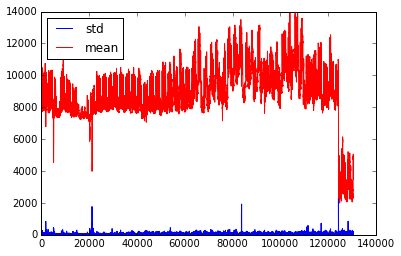

In [152]:
plt.plot(segment_power_std, c='b',label='std')
plt.hold(True)
plt.plot(segment_power_mean, c='r',label='mean')
plt.legend(loc='upper left')

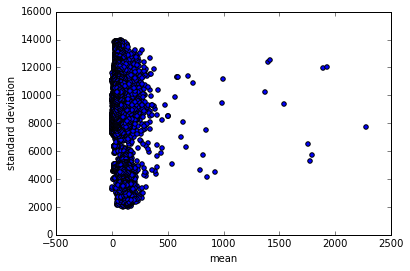

In [154]:
plt.scatter(segment_power_std,segment_power_mean)
plt.xlabel('mean')
plt.ylabel('standard deviation')

The 1D arrays for mean and standard deviations are combined to form one numpy array 'k'. This will now represent two dimensional datapoints to be clustered using k-means algorithm. The transpose is taken to convert into a [length(dataset,2] format.

In [155]:
k = (segment_power_mean,segment_power_std)
k = (np.transpose(k))

### Fitting K-Means algorithm using sklearn toolkit

Unsupervised K-means algorithm clusters the data points based on the eucledian distances of points with the selected centroids. It is an iterative algorithm of selecting the desired number of centroids and calculating the sum of distances of all points from their nearest centroids. This optimization can be directly applied using the sklearn library (http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). KMeans method is initialized with the number of clusters desired and option to specify the method of selecting the algorithm to define the initial centroids (in this case: k-means++). The final centroids and labels suggesting which cluster the point belongs to are obtained using the inbuilt functions in the sklearn library.

Number of clusters are selected to be 2 as the standard deviation v/s mean graph is densely packed in two clusters, one of which is majorly formed by the anomalous data of November month. The november data has significantly lower mean than the usual trend in the rest of the year. This data needs to be identified as an anomaly separately.

In [209]:
kmeans = KMeans(n_clusters=2,init='k-means++')
kmeans.fit(k)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_

print (centroid)
print(labels)

[[ 9255.85403352    48.65867011]
 [ 3442.4342381    110.28733289]]
[0 0 0 ..., 1 1 1]


This clustering is plotted with different colors mapping the classification.

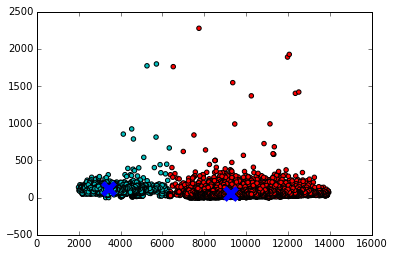

In [163]:
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'c',
                   }

label_color = [LABEL_COLOR_MAP[l] for l in labels]

plt.scatter(k[:,0],k[:,1],c=label_color)
plt.scatter(centroid[:,0],centroid[:,1], marker = "x", s=150, linewidths = 5, zorder =10)
plt.show()

The smaller segment in left represents the anomalous section of November month and can be removed along with the other point showing considerably higher variance. There is no hard boundary between the two clusters mainly because of the overlapping windowed segments that are used.
However, for any other dataset of power consumption of the 'main campus', the November month might not show similar anomaly and hence forming two clusters in that scenario is undesirable. As a result, the algorithm is applied for one cluster to more robustly cater to the different type if datasets that can be observed.

In [167]:
kmeans = KMeans(n_clusters=1,init='k-means++')
kmeans.fit(k)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_
print centroid

[[ 8965.5391491     51.73632814]]


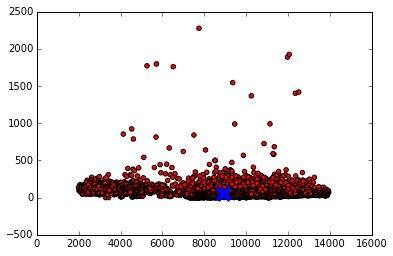

In [166]:
label_color = [LABEL_COLOR_MAP[l] for l in labels]
plt.scatter(k[:,0],k[:,1],c=label_color)
plt.scatter(centroid[:,0],centroid[:,1], marker = "x", s=150, linewidths = 5, zorder =10)
plt.show()

The main data's centroid has now shifted a little left from [ 9255.85, 48.65] to [ 8965.54, 51.74] on changing the number of cluster. Now, considering all points follow a gaussian distribution, we can assign all the points that lie outside the radius of (mean + (2 x std)) from the centroid.

In [176]:
distance = map(lambda X,Y: np.sqrt(np.power((X-centroid[:,0]),2) + np.power((Y-centroid[:,1]),2)), k[:,0],k[:,1])                       

In [194]:
p_max = float((centroid[:,0]+(2*centroid[:,1])))
p_max

9069.011805379316

In [208]:
combined_array = np.hstack((k,distance))
anomaly = combined_array[combined_array[:,2] < p_max]
len(anomaly)
# np.where(combined_array[:,2]>p_max)
# combined_array[:,2]>p_max


130600

combined array

In [210]:
# import json

# with open("Anomaly Detection Tutorial 2.ipynb") as f:
#     contents = json.load(f)
#     wordcount = 0
#     codecount = 0
#     for cell in contents["cells"]:
#         if cell["cell_type"] == "markdown":
#             for line in cell["source"]:
#                 wordcount += len(line.split())
#         elif cell["cell_type"] == "code":
#             for line in cell["source"]:
#                 codecount += int(not line.startswith("#"))
#     print wordcount, codecount

1316 105
